#Text Summarization
Text summarization is the technique, where a computer program shortens longer texts and generates summaries to pass the intended message, is defined as Automatic Text Summarization (ATS) and is a common problem in machine learning and natural language processing (NLP).  Text identification, interpretation and summary generation, and analysis of the generated summary are some of the key challenges faced in the process of text summarization. The critical tasks in extraction-based summarization are identifying key phrases in the document and using them to discover relevant information to be included in the summary. 

In this script, we develop the text summarization task using the colon cancer files of CodiEsp in order to achieve the first stage of the project.

This task is developed using two pretrained models: **GPT2** and **BART**. ROUGE and BERTscore were selected for evaluating summarization of texts.

#Define ICD10 codes for colon cancer

According to [ICD10data](https://www.icd10data.com/ICD10CM/Codes/C00-D49/C15-C26) the Malignant neoplasms of digestive organs especifically Malignant neoplasm of colon is coded with c18:


*   C18.0 Malignant neoplasm of cecum
*   C18.1 Malignant neoplasm of appendix
*   C18.2 Malignant neoplasm of ascending colon
*   C18.3 Malignant neoplasm of hepatic flexure
*   C18.4 Malignant neoplasm of transverse colon
*   C18.5 Malignant neoplasm of splenic flexure
*   C18.6 Malignant neoplasm of descending colon
*   C18.7 Malignant neoplasm of sigmoid colon
*   C18.8 Malignant neoplasm of overlapping sites of colon
*   C18.9 Malignant neoplasm of colon, unspecified

We are going to select the files with these codes in order to work in summarization task for cancer colon files. It is necessary search in each folder (Train, Test and Dev)  the files with C18 code. 

#Conect with CodiEsp in drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/DEUSTO/text_summ/

/content/drive/MyDrive/DEUSTO/text_summ


#Gathering Dataset for colon cancer 
Create file with path of files for colon cancer ICD-10: C18

In [ ]:
files = []

import csv

path = '/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp'

with open(path + "/train/trainD.tsv", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if row[1][0:3] == 'c18':
          path_file = path + '/train/text_files/' + row[0] +'.txt' 
          print(path_file)
          files.append(path_file)

with open(path + "/test/testD.tsv", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if row[1][0:3] == 'c18':
          path_file = path + '/test/text_files/' + row[0] +'.txt' 
          print(path_file)
          files.append(path_file)

with open(path + "/dev/devD.tsv", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        if row[1][0:3] == 'c18':
          path_file = path + '/dev/text_files/' + row[0] +'.txt' 
          print(path_file)
          files.append(path_file)


Save the file with paths 

In [ ]:
import pickle

pickle_out = open("/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/CancerColonFiles.pickle","wb") #path are saved in CancerColonFiles.pickle 
pickle.dump(files, pickle_out)
pickle_out.close()

If file is saved, skip the first step and just load file with paths

In [ ]:
import pickle

pickle_in = open("/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/CancerColonFiles.pickle","rb")
files = pickle.load(pickle_in)

#Text Summarization with BART
#BART (Bidirectional and Auto-Regressive Transformer)
BART is a pretrained transformer that combines the Bidirectional Encoder **BERT** and an Autoregressive decoder **GPT**.  
A transformer is a Machine Learning (ML) architecture that combines an encoder with a decoder. It converts input sequences (e.g. phrases) into some intermediate format before convert into human understable format.
BART is a denoising autoencoder built with a sequence-to-sequence model that is applicable to  a  very  wide  range  of  end  tasks.

**BERT (Bidirectional Encoder Representations from Transformers):** is a technique based on neural networks for natural language processing pre-training. Its key technical innovation is applying the bidirectional training of Transformer. This is in contrast to previous efforts which looked at a text sequence either from left to right or combined left-to-right and right-to-left training. A language model which is bidirectionally trained can have a deeper sense of language context and flow than single-direction language models. The researchers detail a novel technique named Masked LM (MLM) which allows bidirectional training in models in which it was previously impossible. 

**GPT (Generative Pre-trained Transformer):** GPT is leveraged transformer to perform both unsupervised learning and supervised learning to learn text representation for NLP downstream tasks. The approach has attracted significant interest because it demonstrates to improve the performance of language models significantly. One of the key reasons for this observation is that there is a scarcity of labeled datasets; they are often also labeled for one particular domain. Unlabeled text, however, does contain all the patterns, but has no labels. It is also much more abundant compared to labeled text. 

Consequently, BERT's goal  is to predict the missing samples as despicted below.

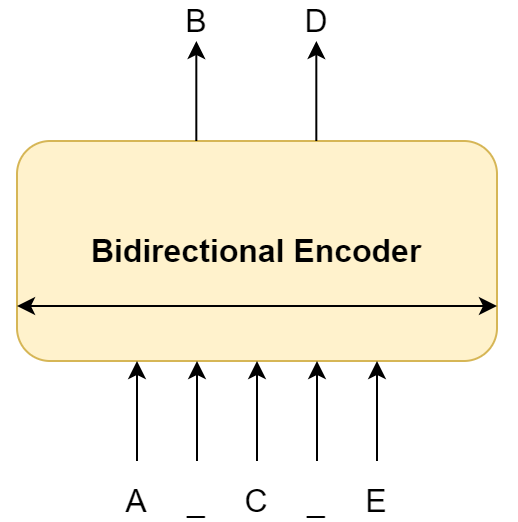

Besides, GPT's goal is to predict the next token as shown below 

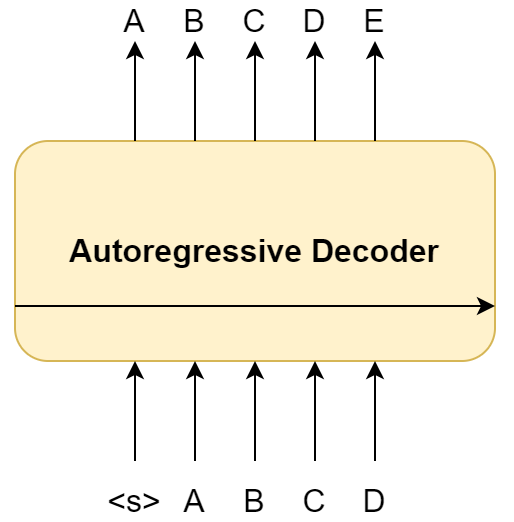

Therefore, BART combines the two approaches into one:

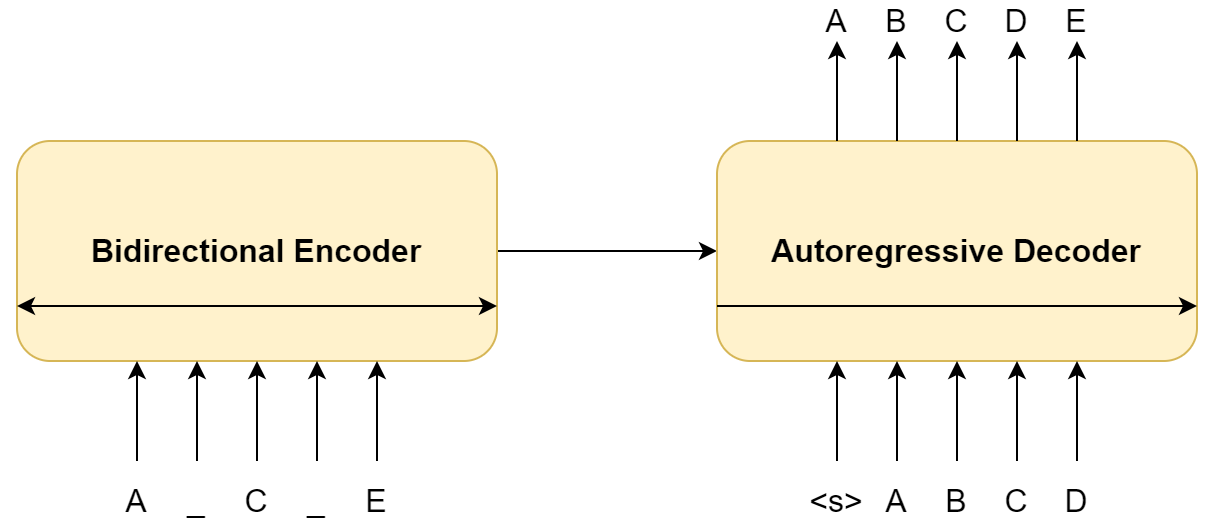

**References:**

[BART: Denoising Sequence-to-Sequence Pre-training for NaturalLanguage Generation, Translation, and Comprehension](chrome-extension://dagcmkpagjlhakfdhnbomgmjdpkdklff/enhanced-reader.html?openApp&pdf=https%3A%2F%2Farxiv.org%2Fpdf%2F1910.13461.pdf)

[BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](chrome-extension://dagcmkpagjlhakfdhnbomgmjdpkdklff/enhanced-reader.html?openApp&pdf=https%3A%2F%2Farxiv.org%2Fpdf%2F1810.04805.pdf)

[Improving Language Understanding by Generative Pre-Training](https://www.cs.ubc.ca/~amuham01/LING530/papers/radford2018improving.pdf)



Install BART packages

In [ ]:
pip install transformers

The pretrained model "facebook bart large cnn" from transformers was used to implement the tokenization and summarization process.   

Summarization process with BART include a maximum length of 1024 tokens. This is the reason why we use batches of tokens with the exact model max length, in order to complete the entire text.



In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
import torch

model = BartForConditionalGeneration.from_pretrained('facebook/bart-large-cnn')
tokenizer = BartTokenizer.from_pretrained('facebook/bart-large-cnn')

def Summarization_process(long_text):  

  # tokenize without truncation
  inputs_no_trunc = tokenizer(long_text, max_length=None, return_tensors='pt', truncation=False)

  # get batches of tokens corresponding to the exact model_max_length
  chunk_start = 0
  chunk_end = tokenizer.model_max_length  # == 1024 for Bart

  inputs_batch_lst = []
  while chunk_start <= len(inputs_no_trunc['input_ids'][0]):
      inputs_batch = inputs_no_trunc['input_ids'][0][chunk_start:chunk_end]  # get batch of n tokens
      inputs_batch = torch.unsqueeze(inputs_batch, 0)
      inputs_batch_lst.append(inputs_batch)
      chunk_start += tokenizer.model_max_length  # == 1024 for Bart
      chunk_end += tokenizer.model_max_length  # == 1024 for Bart

  # generate a summary on each batch
  summary_ids_lst = [model.generate(inputs, num_beams=4, max_length=100, early_stopping=True) for inputs in inputs_batch_lst]

  # decode the output and join into one string with one paragraph per summary batch
  summary_batch_lst = []
  for summary_id in summary_ids_lst:
      summary_batch = [tokenizer.decode(g, skip_special_tokens=True, clean_up_tokenization_spaces=False) for g in summary_id]
      summary_batch_lst.append(summary_batch[0])
  summary_all = '\n'.join(summary_batch_lst)
  return summary_all

We store the summaries done by BART in "summaries_BART" with the text ID. the resulted summaries are shown as follow:

In [ ]:
import numpy as np

Summaries_BART = np.zeros([1,2])

for i in files:
  f = open(i, "r", encoding="utf8")
  long_text =  f.read()
  summary = Summarization_process(long_text)
  Summaries_BART = np.vstack((Summaries_BART,[i[-29:],summary]))

Summaries_BART = Summaries_BART[1:]

for i in Summaries_BART:
  print(i)

#Evaluate BART Text Summarization with ROUGE 
#ROUGE (Recall-Oriented Understudy for Gisting Evaluation)
ROUGE is  a set of metrics for evaluating automatic summarization of texts as well as machine translation. It works by comparing an automatically produced summary or translation against a set of reference summaries (typically human produced)
ROUGE is a score of overlapping words between the system summary and
reference summary.

ROUGE N, measures the number of matching ‘n-grams’ between our model-generated text and a ‘reference’. An n-gram is simply a grouping of tokens/words. A unigram (1-gram) would consist of a single word. A bigram (2-gram) consists of two consecutive words. ROUGE-1 and ROUGE-2 refers to overlap of unigrams and bigrams between the system summary and reference summary respectively.

ROUGE L, measures the longest common subsequence (LCS) between our model output and reference. All this means is that we count the longest sequence of tokens that is shared between both. The idea here is that a longer shared sequence would indicate more similarity between the two sequences.

According to which  n-gram to us, we can calculate the ROUGE recall, precision, or F1 score.

**Recall:** counts the number of overlapping n-grams found in both the model output and reference — then divides this number by the total number of n-grams in the reference.

**Precision:** counts the number of overlapping n-grams found in both the model output and reference divide by the model n-gram count.

**F1 Score:** With the recall and precision values, we can calculate ROUGE F1.





**References:**
[ROUGE: A Package for Automatic Evaluation of Summaries](https://aclanthology.org/W04-1013/)

Install ROUGE packages

In [ ]:
pip install rouge

Path where the reference summaries are stored:

In [ ]:
%cd /content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/ref_sum_en/

/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/ref_sum_en


With rouge package we can estimate ROUGE metric, scores we get are Precision, Recall and F1 Measure for each ROUGE1, ROUGE2 and ROUGEL. The results for summaries by BART model will be shown below for each text

In [ ]:
from rouge import Rouge 
import os
import numpy as np
import pandas as pd

rouge = Rouge()

df_rouge = pd.DataFrame()
for file in os.listdir():
  for i in Summaries_BART:
    if file == i[0]:
      f = open(file, "r", encoding="utf8")      
      read_s_ref = f.read()
      read_s_model = i[1]
      scores = rouge.get_scores(read_s_model, read_s_ref)
      print(i[0])
      for j in scores:
        df_test = pd.DataFrame.from_dict(j,orient='index')        
      print(df_test) 
      df1 = pd.DataFrame([df_test.iloc[0,0], df_test.iloc[0,1], df_test.iloc[0,2]]).transpose()
      df2 = pd.DataFrame([df_test.iloc[1,0], df_test.iloc[1,1], df_test.iloc[1,2]]).transpose()
      df3 = pd.DataFrame([df_test.iloc[2,0], df_test.iloc[2,1], df_test.iloc[2,2]]).transpose()

      df_ = pd.concat([df1,df2,df3],axis=1)

      df_rouge = pd.concat([df_rouge,df_],axis=0)
      #df_test.head()
      print('\n')
df_rouge

In [ ]:
df_rouge.describe()

#Evaluate BART Text Summarization with BERTscore

#BERTscore
Is an automatic evaluation metric for text generation, computes a similarity score for each token in the candidate sentence with each token in the reference sentence. BERTscore computes token similarity using contextual embeddings and correlates better with human judgments and provides stronger model selection performance than existing metrics. BERTScore leverages the pre-trained contextual embeddings from BERT and matches words in candidate and reference sentences by cosine similarity. Moreover, BERTScore computes precision, recall, and F1 measure, which can be useful for evaluating different language generation tasks. BERTScore recall can be computed as shown below:
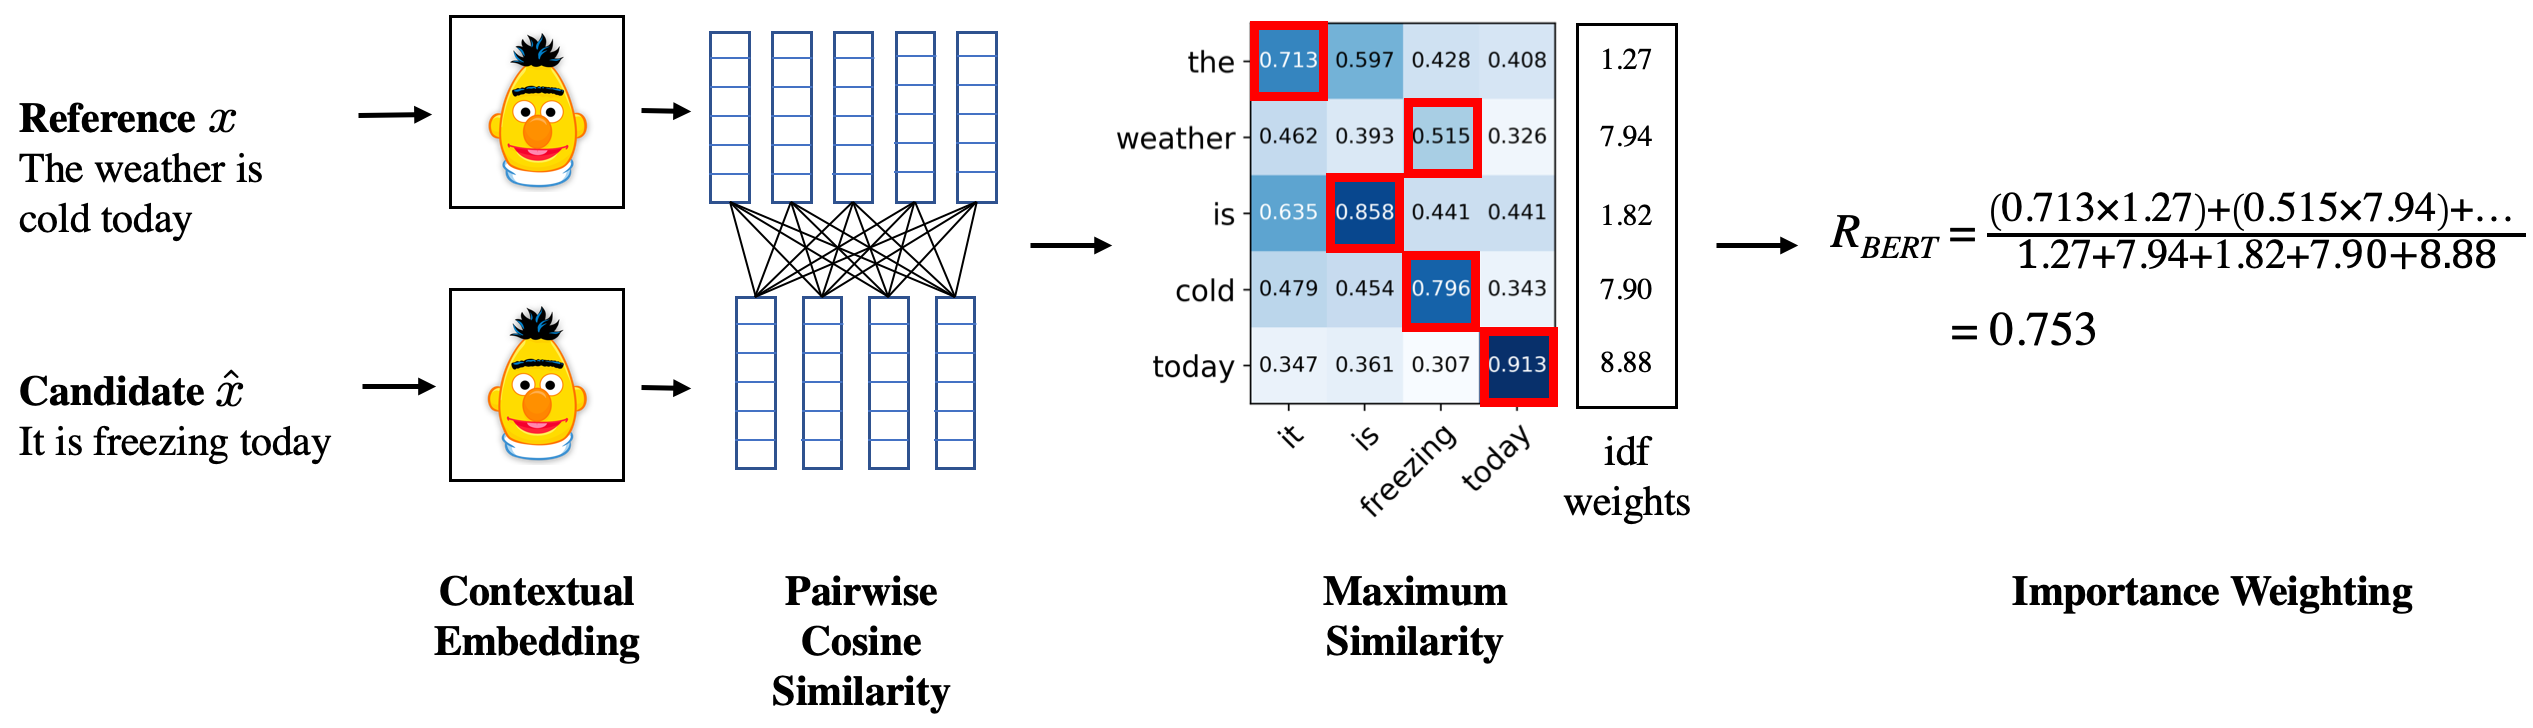

**References:** [BERTSCORE: EVALUATING TEXT GENERATION WITH BERT](https://arxiv.org/pdf/1904.09675.pdf)

Install BERTscore packages

In [ ]:
pip install bert-score

Path where the reference summaries are stored:

In [ ]:
%cd /content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/ref_sum_en/

/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/ref_sum_en


BERTScore precision, recall, and F1 measure for BART summaries will be shown with the execution of the code

In [ ]:
import os
import numpy as np
from bert_score import score


df_Bscores = pd.DataFrame({'ID-text':[],'Precision':[],'Recall':[],'F1':[]})
for file in os.listdir():
  for i in Summaries_BART:
    if file == i[0]:
      #print('\n')
      #print(i[0])
      with open(file) as f:
        f = open(file, "r", encoding="utf8")      
        read_s_ref = [f.read()]
        #print(read_s_ref)
      read_model = i[1]
      read_s_model = [read_model]
      #print(read_s_model)

      try:
        (P, R, F), hashname = score(read_s_ref, read_s_model, lang="en", return_hash=True)
        #print(f"{hashname}: P={P.mean().item():.6f} R={R.mean().item():.6f} F={F.mean().item():.6f}")        
        df1 = pd.DataFrame([[i[0],P.mean().item(),R.mean().item(),F.mean().item()]],columns=['ID-text','Precision','Recall','F1'])
        df_Bscores = pd.concat([df_Bscores,df1])

      except:
        print("Different number of candidates and references")
df_Bscores

In [ ]:
df_Bscores.describe()

#Text Summarization with GPT2

#GPT2 (Generative Pre-trained Transformer 2)
GPT-2 is a large pretrained transformer-based language model with 1.5 billion parameters which we can use for various NLP tasks, such as, text generation, language translation, building question-answering systems, and so on. GPT-2 was trained on a dataset of 8 million web pages. 
The architecture of GPT-2 is based on the very famous Transformers concept that was proposed by Google in their paper “Attention is all you need”. The Transformer provides a mechanism based on encoder-decoders to detect input-output dependencies.
At each step, the model consumes the previously generated symbols as additional input when generating the next output.
GPT-2 is trained with a simple objective: predict the next word, given all of the previous words within some text. The diversity of the dataset causes this simple goal to contain naturally occurring demonstrations of many tasks across diverse domains. GPT-2 is a direct scale-up of GPT, with more than 10X the parameters and trained on more than 10X the amount of data.


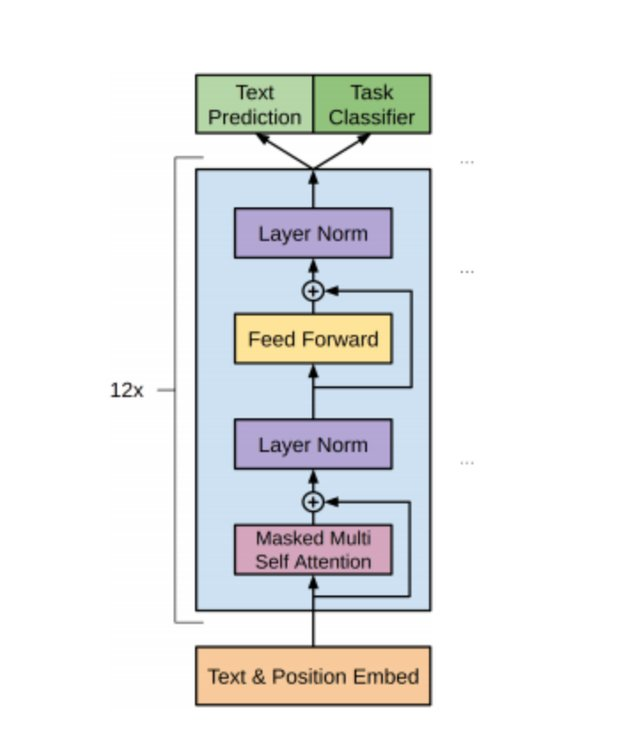

**References:**
[Language Models are Unsupervised Multitask Learners](https://cdn.openai.com/better-language-models/language_models_are_unsupervised_multitask_learners.pdf)


Install GPT2 packages

In [ ]:
pip install bert-extractive-summarizer

The resulted summaries done by GPT2 model are stored in "Summaries_GPT" with the text ID. the resulted summaries will be shown with the execution of this code:

In [ ]:
from summarizer import TransformerSummarizer
import numpy as np

GPT2_model = TransformerSummarizer(transformer_type="GPT2",transformer_model_key="gpt2-medium")

Summaries_GPT = np.zeros([1,2])

for i in files:
  f = open(i, "r", encoding="utf8")
  long_text =  f.read()
  text_ = "".join(long_text)
  summerize = ''.join(GPT2_model(text_, min_length=60, max_length=400))
  Summaries_GPT = np.vstack((Summaries_GPT,[i[-29:],summerize]))

Summaries_GPT = Summaries_GPT[1:]

for i in Summaries_GPT:
  print(i)

#Evaluate GPT2 Text Summarization with ROUGE

The ROUGE1,2,L scores for summaries by GPT2 model will be calculated using the following code. 

In [ ]:
from rouge import Rouge 
import os
import numpy as np

path = "/content/drive/MyDrive/DEUSTO/text_summ/CodiEsp/Ref_sum/"
Rouge_scores = np.zeros([1,9])
rouge = Rouge()

df_GPT_rouge = pd.DataFrame()
for file in os.listdir():
  for i in Summaries_GPT:
    if file == i[0]:
      f = open(file, "r", encoding="utf8")      
      read_s_ref = f.read()
      read_s_model = i[1]
      scores = rouge.get_scores(read_s_model, read_s_ref)
      print(i[0])
      for j in scores:
        df_test = pd.DataFrame.from_dict(j,orient='index')
      print(df_test) 
      df1 = pd.DataFrame([df_test.iloc[0,0], df_test.iloc[0,1], df_test.iloc[0,2]]).transpose()
      df2 = pd.DataFrame([df_test.iloc[1,0], df_test.iloc[1,1], df_test.iloc[1,2]]).transpose()
      df3 = pd.DataFrame([df_test.iloc[2,0], df_test.iloc[2,1], df_test.iloc[2,2]]).transpose()

      df_ = pd.concat([df1,df2,df3],axis=1)

      df_GPT_rouge = pd.concat([df_GPT_rouge,df_],axis=0)
      #df_test.head()
      print('\n')
df_GPT_rouge      

A table resume is necessary to understand the behaviour of the model. With this purpose the next code cell will show the matrics obtained so far.

In [ ]:
df_GPT_rouge.describe()

#Evaluate GPT2 Text Summarization with BERTscore

BERTScore precision, recall, and F1 measure for GPT2 summaries will be shown as result of the execution of the following code

In [ ]:
import os
import numpy as np
from bert_score import score

#Bert_scores = np.zeros([1,3])
df_GPT_Bscores = pd.DataFrame({'ID-text':[],'Precision':[],'Recall':[],'F1':[]})
for file in reversed(os.listdir()) :
  for i in Summaries_GPT:
    if file == i[0]:
      #print('\n')
      #print(i[0])
      with open(file) as f:
        f = open(file, "r", encoding="utf8")      
        read_s_ref = [f.read()]
        #print(read_s_ref[0])
      read_model = i[1]
      read_s_model = [read_model]
      #print(read_s_model)

      try:
        (P, R, F), hashname = score(read_s_ref, read_s_model, lang="en", return_hash=True)
        #print(f"{hashname}: P={P.mean().item():.6f} R={R.mean().item():.6f} F={F.mean().item():.6f}")  
        df1 = pd.DataFrame([[i[0],P.mean().item(),R.mean().item(),F.mean().item()]],columns=['ID-text','Precision','Recall','F1'])
        df_GPT_Bscores = pd.concat([df_GPT_Bscores,df1])      
      except:
        print("Different number of candidates and references")
df_GPT_Bscores

A table resume is necessary to understand the behaviour of the model. With this purpose the next code cell will show the matrics obtained so far.

In [ ]:
df_GPT_Bscores.describe()